In [16]:
import pandas as pd
from pandas import Series,DataFrame
    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [17]:
movies_dframe = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')

### Data Wrangling

In [18]:
movies_dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [19]:
movies_dframe.shape

(10866, 21)

### Cleaning Data

In [20]:
del_col = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

In [21]:
movies_dframe = movies_dframe.drop(del_col, 1)

In [23]:
movies_dframe.head(2)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015


In [26]:
#keep the first one and delete duplicate rows
movies_dframe.drop_duplicates(keep = 'first', inplace = True)

In [27]:
movies_dframe.shape

(10865, 10)

 replace the value of '0' to NaN

In [28]:
check_row = ['budget', 'revenue']
movies_dframe[check_row] = movies_dframe[check_row].replace(0, np.NaN)
movies_dframe.dropna(subset = check_row, inplace = True)
movies_dframe.shape

(3854, 10)

replacing 0 with NaN of runtime column

In [29]:
movies_dframe['runtime'] = movies_dframe['runtime'].replace(0, np.NaN)

convert the 'release_date' column to date format

In [30]:
movies_dframe.release_date = pd.to_datetime(movies_dframe['release_date'])
movies_dframe.head(2)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


convert the 'budget'& 'revenue'column to int64

In [32]:
change_coltype = ['budget', 'revenue']
movies_dframe[change_coltype] = movies_dframe[change_coltype].applymap(np.int64)
movies_dframe.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [36]:
movies_dframe.rename(columns = {'budget' : 'budget_(US-$)', 'revenue' : 'revenue_(US-$)'}, inplace = True)

In [37]:
movies_dframe.head(1)

,budget_(in_US-Dollars),revenue_(in_US-Dollars),original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015


the profits of each movie

In [39]:
movies_dframe.insert(2, 'profit_(in_US_Dollars)', movies_dframe['revenue_(in_US-Dollars)'] - movies_dframe['budget_(in_US-Dollars)'])
movies_dframe['profit_(in_US_Dollars)'] = movies_dframe['profit_(in_US_Dollars)'].apply(np.int64)
movies_dframe.head(1)

,budget_(in_US-Dollars),revenue_(in_US-Dollars),profit_(in_US_Dollars),original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015


### Q1 Which movie earns the most and least profit?

In [41]:
def highest_lowest(column_name):
    highest_id = movies_dframe[column_name].idxmax()
    highest_details = pd.DataFrame(movies_dframe.loc[highest_id])
    lowest_id = movies_dframe[column_name].idxmin()
    lowest_details = pd.DataFrame(movies_dframe.loc[lowest_id])
    two_in_one_data = pd.concat([highest_details, lowest_details], axis = 1)
    
    return two_in_one_data

highest_lowest('profit_(in_US_Dollars)')

,1386,2244
budget_(in_US-Dollars),237000000,425000000
revenue_(in_US-Dollars),2781505847,11087569
profit_(in_US_Dollars),2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


### Q2 Which movie had the greatest and least runtime?

In [42]:
highest_lowest('runtime')

,2107,5162
budget_(in_US-Dollars),18000000,10
revenue_(in_US-Dollars),871279,5
profit_(in_US_Dollars),-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


### Q3 Which movie had the greatest and least budget?

In [43]:
highest_lowest('budget_(in_US-Dollars)')

,2244,2618
budget_(in_US-Dollars),425000000,1
revenue_(in_US-Dollars),11087569,100
profit_(in_US_Dollars),-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


### Q4 Which movie had the greatest and least budget?

In [44]:
highest_lowest('revenue_(in_US-Dollars)')

,1386,5067
budget_(in_US-Dollars),237000000,6000000
revenue_(in_US-Dollars),2781505847,2
profit_(in_US_Dollars),2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


### Q5 What is the average runtime of all movies?

In [47]:
def average_func(column_name):
    
    return movies_dframe[column_name].mean()

In [48]:
average_func('runtime')

109.22029060716139

##### The average runtime of all movies in this dataset is 109 mins approx. We want to get a deeper look and understanding of runtime of all movies so Let's plot it.

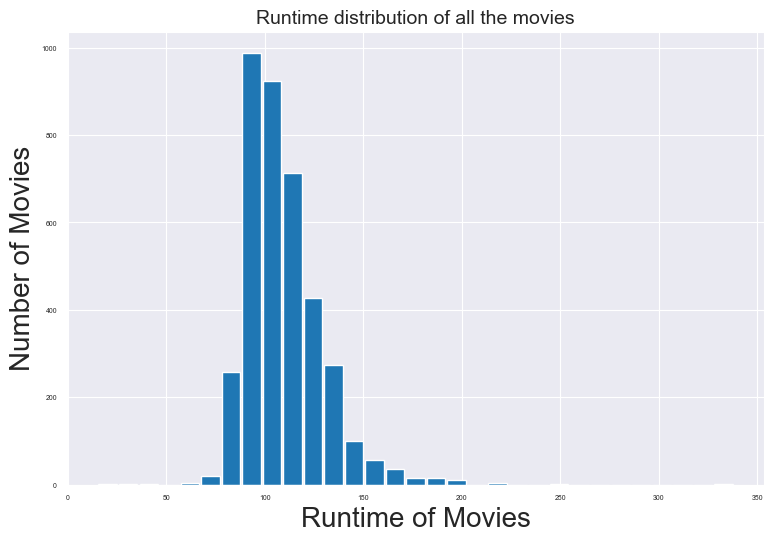

In [56]:
sns.set_style('darkgrid')
plt.rc('xtick', labelsize = 5)
plt.rc('ytick', labelsize = 5)
plt.figure(figsize=(9,6), dpi = 100)
plt.xlabel('Runtime of Movies', fontsize = 20)
plt.ylabel('Number of Movies', fontsize=20)
plt.title('Runtime distribution of all the movies', fontsize=14)
plt.hist(movies_dframe['runtime'], rwidth = 0.9, bins =31)
plt.show()

In [57]:
movies_dframe['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

### Q6 in which year we had the most movies making profits?

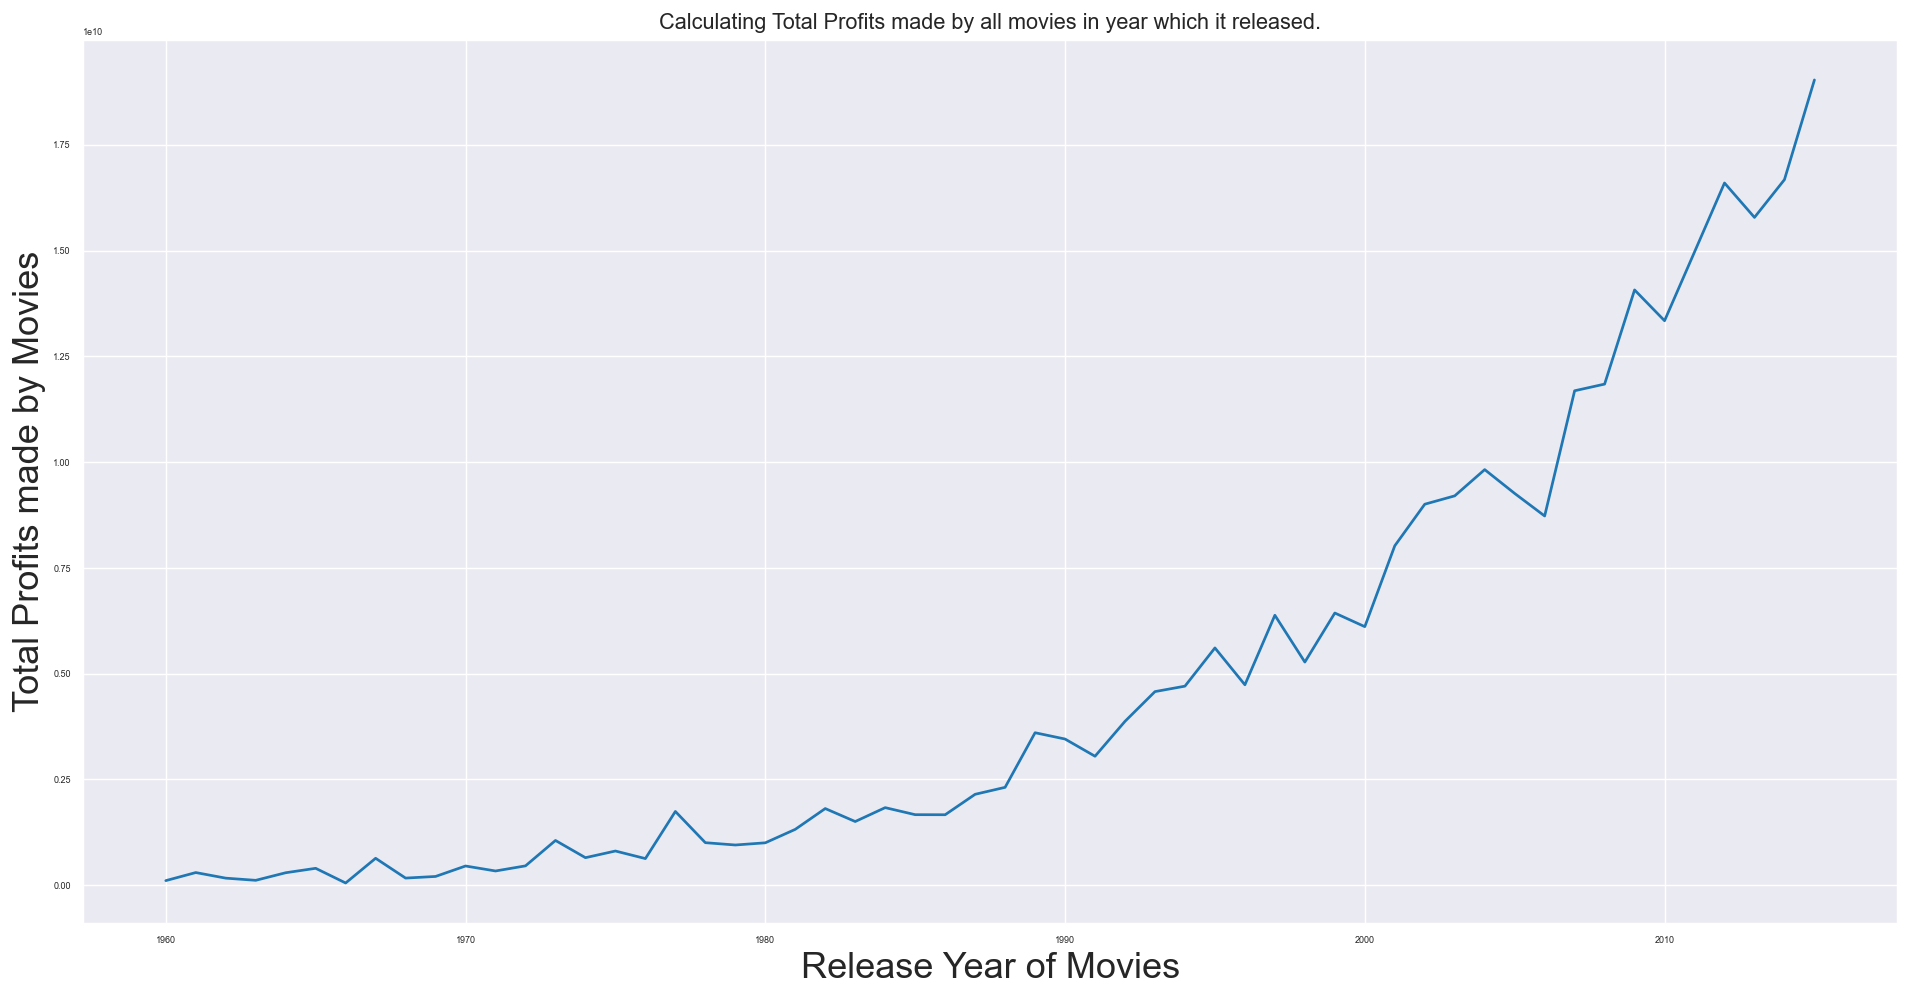

In [58]:
profits = movies_dframe.groupby('release_year')['profit_(in_US_Dollars)'].sum()
plt.figure(figsize=(18,9), dpi = 130)
plt.xlabel('Release Year of Movies', fontsize = 20)
plt.ylabel('Total Profits made by Movies', fontsize = 20)
plt.title('Calculating Total Profits made by all movies in year which it released.')
plt.plot(profits)
plt.show()

In [59]:
profits.idxmax()

2015

In [60]:
profits = pd.DataFrame(profits)

In [61]:
profits.tail()

,profit_(in_US_Dollars)
release_year,
2011,14966694704
2012,16596845507
2013,15782743325
2014,16676201357
2015,19032145273


### Q7 Average runtime of movies

In [63]:
profit_movies_dframe = movies_dframe[movies_dframe['profit_(in_US_Dollars)'] >= 50000000]
profit_movies_dframe.index = range(len(profit_movies_dframe))
profit_movies_dframe.index = profit_movies_dframe.index + 1
profit_movies_dframe.head(2)

,budget_(in_US-Dollars),revenue_(in_US-Dollars),profit_(in_US_Dollars),original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


In [64]:
len(profit_movies_dframe)

1338

In [65]:
def prof_avg_fuc(column_name):
    return profit_movies_dframe[column_name].mean()

In [66]:
prof_avg_fuc('runtime')

113.66741405082212

### Average Budget

In [67]:
prof_avg_fuc('budget_(in_US-Dollars)')

60444957.76083707

### Average Revenue of Movies

In [68]:
prof_avg_fuc('revenue_(in_US-Dollars)')

254957662.59491777

### Average Profit of Movies

In [69]:
prof_avg_fuc('profit_(in_US_Dollars)')

194512704.83408073

### Which directer directed most films?

In [70]:
def extract_data(column_name):
    all_data = profit_movies_dframe[column_name].str.cat(sep = '|')
    all_data = pd.Series(all_data.split('|'))
    count = all_data.value_counts(ascending = False)
    
    return count

In [71]:
director_count = extract_data('director')
director_count.head()

Steven Spielberg    23
Robert Zemeckis     13
Clint Eastwood      12
Tim Burton          11
Tony Scott          10
dtype: int64

### most cast appeared

In [72]:
cast_count = extract_data('cast')
cast_count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

### Most genre produced

In [73]:
genre_count = extract_data('genres')
genre_count.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

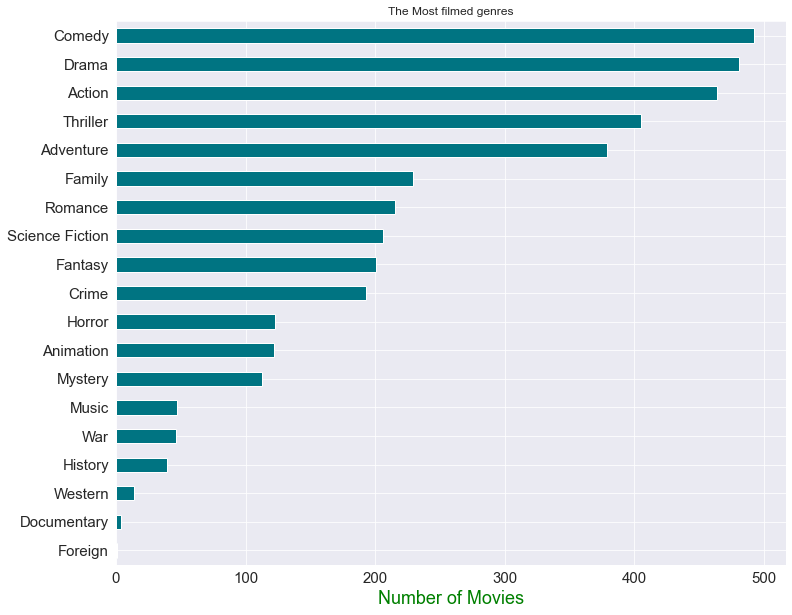

In [74]:
genre_count.sort_values(ascending = True, inplace = True)
ax = genre_count.plot.barh(color = '#007482', fontsize = 15)
ax.set(title = 'The Most filmed genres')
ax.set_xlabel('Number of Movies', color = 'g', fontsize = '18')
ax.figure.set_size_inches(12, 10)
plt.show()